<a href="https://colab.research.google.com/github/maddisurekha1234/Dental_Informatics_Project/blob/main/Article_References_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Mounting the drive for collecting data from csv files 
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls "/content/drive/My Drive/Latest_files_Jan26/"

Article0.json	 Article33.json  Article70.json
Article100.json  Article34.json  Article71.json
Article101.json  Article35.json  Article72.json
Article102.json  Article36.json  Article73.json
Article103.json  Article37.json  Article74.json
Article104.json  Article38.json  Article75.json
Article105.json  Article39.json  Article76.json
Article106.json  Article3.json	 Article77.json
Article107.json  Article40.json  Article78.json
Article108.json  Article41.json  Article79.json
Article109.json  Article42.json  Article7.json
Article10.json	 Article43.json  Article80.json
Article110.json  Article44.json  Article81.json
Article111.json  Article45.json  Article82.json
Article112.json  Article46.json  Article83.json
Article113.json  Article47.json  Article84.json
Article114.json  Article48.json  Article85.json
Article11.json	 Article49.json  Article86.json
Article12.json	 Article4.json	 Article87.json
Article13.json	 Article50.json  Article88.json
Article14.json	 Article51.json  Article89.json
Ar

In [12]:
#collection of reference information and appending the data into a datraframe and csv file.
import json
import pandas
import pandas as pd
from pandas import DataFrame
import re
referencepaperidlist = []
Referencepaperdoilist = []
Referencepapertitlelist = []
Referencepapervenuelist = []
Referencepaperyearlist = []
Isinfluentiallist = [] 
Intentlist = []
article_id = []
for i in range(115):
  f = open('/content/drive/MyDrive/Latest_files_Jan26/Article' + str(i) + '.json')
  data = json.load(f)
  article_data = data['doi']
  for value in data['references']:
    article_id.append(article_data)
    referencepaperid = value['paperId']
    referencepaperidlist.append(referencepaperid)
    referencepaperdoi = value['doi']
    Referencepaperdoilist.append(referencepaperdoi)
    Referencepapertitle = value['title']
    Referencepapertitlelist.append(Referencepapertitle)
    Referencepapervenue = value['venue']
    Referencepapervenuelist.append(Referencepapervenue)
    Referencepaperyear = value['year']
    Referencepaperyearlist.append(Referencepaperyear)
    Intent = value['intent']
    Intentlist.append(Intent)
    Isinfluential = value['isInfluential']
    Isinfluentiallist.append(Isinfluential)
a = {'article_id': article_id,'Reference_paper_id' : referencepaperidlist ,'Reference_paper_doi' : Referencepaperdoilist ,'Reference _paper_title' : Referencepapertitlelist ,
     'Reference_paper_venue' :Referencepapervenuelist, 'Reference_paper_year': Referencepaperyearlist,
     'Intent' : Intentlist,'Is_influential' : Isinfluentiallist}
df = pd.DataFrame.from_dict(a, orient='index')
df1 = df.transpose()
df1['Intent'] = df1['Intent'].apply(lambda x : ' '.join(map(str, x)))
df1.to_csv('/content/drive/MyDrive/Latest_files_Jan26/Reference_articles.csv', columns = a)
df1.to_csv("reference_articles.csv")
df1

,article_id,Reference_paper_id,Reference_paper_doi,Reference _paper_title,Reference_paper_venue,Reference_paper_year,Intent,Is_influential
0,10.5455/aim.2012.20.47-55,0f75e25cef78d7f84d20812d3b617fa1a5bbd471,10.1136/bmj.321.7262.713/a,Source,BMJ : British Medical Journal,2000,,False
1,10.5455/aim.2012.20.47-55,b974a3210386d73fe735e891ab1f057c9d4cb333,None,Prikaz predloženog rješenja središnjeg informa...,,2004,,False
2,10.5455/aim.2012.20.47-55,da01e7fd7a6af8f8a4e5a8ed1019c9881cf7127b,None,Uspostava i razvoj informacijskog sustava u pr...,,2004,,False
3,10.5455/aim.2012.20.47-55,df6b9c1e30aecd9b2a240bcfc80495cd1eb1a6e1,None,Primjena informacijskih tehnologija u stomatol...,,2004,,False
4,10.1177/154407370301700108,73163af27c031b5024cd1f4930757393c2cfa990,10.1038/NBT1186-925,Sequence the Human Genome,Bio/Technology,1986,background,False
...,...,...,...,...,...,...,...,...
2801,10.3233/978-1-58603-864-9-529,f091df18cf7ae333019b992e8b24283463b78676,None,Universal electronic health record MUDR.,Studies in health technology and informatics,2004,,False
2802,10.3233/978-1-58603-864-9-529,0e3b8e1a160e3f7fdb9da422444cc18dc4ea9bff,10.1016/j.ijmedinf.2004.06.003,User interface of MUDR electronic health record,Int. J. Medical Informatics,2005,,False
2803,10.3233/978-1-58603-864-9-529,40583e31d15bd7ea675645d973943b669ed5ef24,10.14219/JADA.ARCHIVE.2005.0135,The role of voice-activated technology in toda...,Journal of the American Dental Association,2005,background,False
2804,10.3233/978-1-58603-864-9-529,d8a43f7457e7e8525e1bd817bbdeb35619cb645b,None,MUDRLite–an Electronic Health Record Applied t...,,2005,background,False


In [13]:
import numpy as np
df1['Reference_paper_venue'].replace('', np.nan, inplace=True)
print(df1)

                         article_id  ... Is_influential
0         10.5455/aim.2012.20.47-55  ...          False
1         10.5455/aim.2012.20.47-55  ...          False
2         10.5455/aim.2012.20.47-55  ...          False
3         10.5455/aim.2012.20.47-55  ...          False
4        10.1177/154407370301700108  ...          False
...                             ...  ...            ...
2801  10.3233/978-1-58603-864-9-529  ...          False
2802  10.3233/978-1-58603-864-9-529  ...          False
2803  10.3233/978-1-58603-864-9-529  ...          False
2804  10.3233/978-1-58603-864-9-529  ...          False
2805  10.3233/978-1-58603-864-9-529  ...          False

[2806 rows x 8 columns]


In [14]:
df1.dropna(subset=['Reference_paper_venue'], inplace=True)
print(df1)

                         article_id  ... Is_influential
0         10.5455/aim.2012.20.47-55  ...          False
4        10.1177/154407370301700108  ...          False
6        10.1177/154407370301700108  ...          False
9        10.1177/154407370301700108  ...          False
12       10.1177/154407370301700108  ...          False
...                             ...  ...            ...
2800  10.3233/978-1-58603-864-9-529  ...          False
2801  10.3233/978-1-58603-864-9-529  ...          False
2802  10.3233/978-1-58603-864-9-529  ...          False
2803  10.3233/978-1-58603-864-9-529  ...          False
2805  10.3233/978-1-58603-864-9-529  ...          False

[2388 rows x 8 columns]


In [15]:
df_Ref_venus=df1['Reference_paper_venue']
df_Ref_venus.count

<bound method Series.count of 0                      BMJ : British Medical Journal
4                                     Bio/Technology
6               Lecture Notes in Medical Informatics
9       Journal of the California Dental Association
12                       Journal of dental education
                            ...                     
2800    Studies in health technology and informatics
2801    Studies in health technology and informatics
2802                     Int. J. Medical Informatics
2803      Journal of the American Dental Association
2805              Methods of information in medicine
Name: Reference_paper_venue, Length: 2388, dtype: object>

In [19]:
df = pd.read_csv("reference_articles.csv",encoding = "ISO-8859-1")
# df['Reference_paper_venue'] = df['Reference_paper_venue'].str.lower()
df['Reference_paper_venue'] = df['Reference_paper_venue']
df['count'] = df.groupby('Reference_paper_venue')['Reference_paper_venue'].transform('count')
df.drop_duplicates('Reference_paper_venue', inplace=True)
df.nlargest(5, ['count'])[["Reference_paper_venue","count"]]
df1 = df.sort_values('count',ascending=False)
df1["Rank"] = df1["count"].rank(ascending=False)
df1 = df1.dropna(subset=['Rank'])
header = ["Reference_paper_venue", "Rank"]
df1.to_csv('Reference_paper_venue.csv', columns = header)
plotgraph = pd.read_csv("Reference_paper_venue.csv")
plotgraph = df.nlargest(10, ['count'])[["Reference_paper_venue","count"]]
rank=pd.read_csv("Reference_paper_venue.csv")
top10rank = rank.head(10)
# plotgraph['Rank'] = top10rank['Rank'].values
plotgraph

,Reference_paper_venue,count
12,Journal of dental education,206.0
58,J. Am. Medical Informatics Assoc.,148.0
37,Journal of the American Dental Association,135.0
355,Int. J. Medical Informatics,49.0
142,European journal of dental education : officia...,45.0
349,J. Biomed. Informatics,43.0
47,AMIA,39.0
384,BDJ,38.0
237,Journal of dentistry,31.0
24,Journal of dental research,30.0


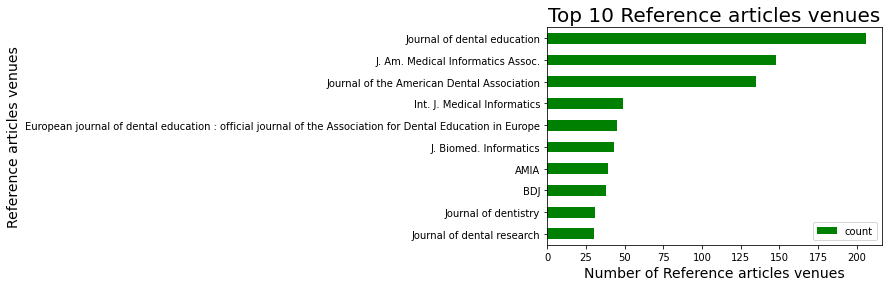

,Reference_paper_venue,count
12,Journal of dental education,206.0
58,J. Am. Medical Informatics Assoc.,148.0
37,Journal of the American Dental Association,135.0
355,Int. J. Medical Informatics,49.0
142,European journal of dental education : officia...,45.0
349,J. Biomed. Informatics,43.0
47,AMIA,39.0
384,BDJ,38.0
237,Journal of dentistry,31.0
24,Journal of dental research,30.0


In [21]:
#Plotting a graph for top 10 authors with the maximum number of articles published.
import pandas as pd
import matplotlib.pyplot as plt
plotgraph.set_index("Reference_paper_venue",drop=True,inplace=True)
ax=plotgraph.plot.barh(color = 'green')
ax.invert_yaxis()
plt.title("Top 10 Reference articles venues",fontsize=20)
plt.xlabel("Number of Reference articles venues",fontsize=14)
plt.ylabel("Reference articles venues",fontsize=14)
plt.show()
plotgraph = df.nlargest(10, ['count'])[["Reference_paper_venue","count"]]
plotgraph